In [1]:
!pip install keras==3.2.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 27.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [2]:
import keras
keras.__version__

'3.2.1'

In [3]:
import os
os.environ["KERAS_BACKEND"] = "jax"

import gc
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt

import tensorflow as tf
import jax
import keras

from sklearn import metrics

from tqdm.notebook import tqdm

print(tf.__version__)
print(jax.__version__)

2.15.0
0.4.26


In [4]:
import os

from google.colab import drive

INIT=True
PATH="/content"

if INIT:
  drive.mount('/content/drive')
  ! pip install kaggle

  !mkdir ~/.kaggle


  ! cp kaggle.json ~/.kaggle/
  ! chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [5]:
! kaggle competitions download -c leap-atmospheric-physics-ai-climsim

100% 72.5G/72.5G [1:01:01<00:00, 15.1MB/s]
100% 72.5G/72.5G [1:01:01<00:00, 21.3MB/s]


In [6]:
! kaggle datasets download -d abiolatti/leap-train-tfrecords
! unzip -o  leap-train-tfrecords.zip -d    leap-train-tfrecords

Dataset URL: https://www.kaggle.com/datasets/abiolatti/leap-train-tfrecords
License(s): unknown
100% 26.7G/26.7G [25:17<00:00, 20.4MB/s]
100% 26.7G/26.7G [25:17<00:00, 18.9MB/s]
Archive:  leap-train-tfrecords.zip
  inflating: leap-train-tfrecords/train_000.tfrec  
  inflating: leap-train-tfrecords/train_001.tfrec  
  inflating: leap-train-tfrecords/train_002.tfrec  
  inflating: leap-train-tfrecords/train_003.tfrec  
  inflating: leap-train-tfrecords/train_004.tfrec  
  inflating: leap-train-tfrecords/train_005.tfrec  
  inflating: leap-train-tfrecords/train_006.tfrec  
  inflating: leap-train-tfrecords/train_007.tfrec  
  inflating: leap-train-tfrecords/train_008.tfrec  
  inflating: leap-train-tfrecords/train_009.tfrec  
  inflating: leap-train-tfrecords/train_010.tfrec  
  inflating: leap-train-tfrecords/train_011.tfrec  
  inflating: leap-train-tfrecords/train_012.tfrec  
  inflating: leap-train-tfrecords/train_013.tfrec  
  inflating: leap-train-tfrecords/train_014.tfrec  
  infla

In [7]:
SEED = 42
keras.utils.set_random_seed(SEED)
tf.random.set_seed(SEED)
tf.config.experimental.enable_op_determinism()

In [8]:

DATA_TFREC = "leap-train-tfrecords"

In [9]:

TARGETS = ['ptend_t_0',
 'ptend_t_1',
 'ptend_t_2',
 'ptend_t_3',
 'ptend_t_4',
 'ptend_t_5',
 'ptend_t_6',
 'ptend_t_7',
 'ptend_t_8',
 'ptend_t_9',
 'ptend_t_10',
 'ptend_t_11',
 'ptend_t_12',
 'ptend_t_13',
 'ptend_t_14',
 'ptend_t_15',
 'ptend_t_16',
 'ptend_t_17',
 'ptend_t_18',
 'ptend_t_19',
 'ptend_t_20',
 'ptend_t_21',
 'ptend_t_22',
 'ptend_t_23',
 'ptend_t_24',
 'ptend_t_25',
 'ptend_t_26',
 'ptend_t_27',
 'ptend_t_28',
 'ptend_t_29',
 'ptend_t_30',
 'ptend_t_31',
 'ptend_t_32',
 'ptend_t_33',
 'ptend_t_34',
 'ptend_t_35',
 'ptend_t_36',
 'ptend_t_37',
 'ptend_t_38',
 'ptend_t_39',
 'ptend_t_40',
 'ptend_t_41',
 'ptend_t_42',
 'ptend_t_43',
 'ptend_t_44',
 'ptend_t_45',
 'ptend_t_46',
 'ptend_t_47',
 'ptend_t_48',
 'ptend_t_49',
 'ptend_t_50',
 'ptend_t_51',
 'ptend_t_52',
 'ptend_t_53',
 'ptend_t_54',
 'ptend_t_55',
 'ptend_t_56',
 'ptend_t_57',
 'ptend_t_58',
 'ptend_t_59',
 'ptend_q0001_0',
 'ptend_q0001_1',
 'ptend_q0001_2',
 'ptend_q0001_3',
 'ptend_q0001_4',
 'ptend_q0001_5',
 'ptend_q0001_6',
 'ptend_q0001_7',
 'ptend_q0001_8',
 'ptend_q0001_9',
 'ptend_q0001_10',
 'ptend_q0001_11',
 'ptend_q0001_12',
 'ptend_q0001_13',
 'ptend_q0001_14',
 'ptend_q0001_15',
 'ptend_q0001_16',
 'ptend_q0001_17',
 'ptend_q0001_18',
 'ptend_q0001_19',
 'ptend_q0001_20',
 'ptend_q0001_21',
 'ptend_q0001_22',
 'ptend_q0001_23',
 'ptend_q0001_24',
 'ptend_q0001_25',
 'ptend_q0001_26',
 'ptend_q0001_27',
 'ptend_q0001_28',
 'ptend_q0001_29',
 'ptend_q0001_30',
 'ptend_q0001_31',
 'ptend_q0001_32',
 'ptend_q0001_33',
 'ptend_q0001_34',
 'ptend_q0001_35',
 'ptend_q0001_36',
 'ptend_q0001_37',
 'ptend_q0001_38',
 'ptend_q0001_39',
 'ptend_q0001_40',
 'ptend_q0001_41',
 'ptend_q0001_42',
 'ptend_q0001_43',
 'ptend_q0001_44',
 'ptend_q0001_45',
 'ptend_q0001_46',
 'ptend_q0001_47',
 'ptend_q0001_48',
 'ptend_q0001_49',
 'ptend_q0001_50',
 'ptend_q0001_51',
 'ptend_q0001_52',
 'ptend_q0001_53',
 'ptend_q0001_54',
 'ptend_q0001_55',
 'ptend_q0001_56',
 'ptend_q0001_57',
 'ptend_q0001_58',
 'ptend_q0001_59',
 'ptend_q0002_0',
 'ptend_q0002_1',
 'ptend_q0002_2',
 'ptend_q0002_3',
 'ptend_q0002_4',
 'ptend_q0002_5',
 'ptend_q0002_6',
 'ptend_q0002_7',
 'ptend_q0002_8',
 'ptend_q0002_9',
 'ptend_q0002_10',
 'ptend_q0002_11',
 'ptend_q0002_12',
 'ptend_q0002_13',
 'ptend_q0002_14',
 'ptend_q0002_15',
 'ptend_q0002_16',
 'ptend_q0002_17',
 'ptend_q0002_18',
 'ptend_q0002_19',
 'ptend_q0002_20',
 'ptend_q0002_21',
 'ptend_q0002_22',
 'ptend_q0002_23',
 'ptend_q0002_24',
 'ptend_q0002_25',
 'ptend_q0002_26',
 'ptend_q0002_27',
 'ptend_q0002_28',
 'ptend_q0002_29',
 'ptend_q0002_30',
 'ptend_q0002_31',
 'ptend_q0002_32',
 'ptend_q0002_33',
 'ptend_q0002_34',
 'ptend_q0002_35',
 'ptend_q0002_36',
 'ptend_q0002_37',
 'ptend_q0002_38',
 'ptend_q0002_39',
 'ptend_q0002_40',
 'ptend_q0002_41',
 'ptend_q0002_42',
 'ptend_q0002_43',
 'ptend_q0002_44',
 'ptend_q0002_45',
 'ptend_q0002_46',
 'ptend_q0002_47',
 'ptend_q0002_48',
 'ptend_q0002_49',
 'ptend_q0002_50',
 'ptend_q0002_51',
 'ptend_q0002_52',
 'ptend_q0002_53',
 'ptend_q0002_54',
 'ptend_q0002_55',
 'ptend_q0002_56',
 'ptend_q0002_57',
 'ptend_q0002_58',
 'ptend_q0002_59',
 'ptend_q0003_0',
 'ptend_q0003_1',
 'ptend_q0003_2',
 'ptend_q0003_3',
 'ptend_q0003_4',
 'ptend_q0003_5',
 'ptend_q0003_6',
 'ptend_q0003_7',
 'ptend_q0003_8',
 'ptend_q0003_9',
 'ptend_q0003_10',
 'ptend_q0003_11',
 'ptend_q0003_12',
 'ptend_q0003_13',
 'ptend_q0003_14',
 'ptend_q0003_15',
 'ptend_q0003_16',
 'ptend_q0003_17',
 'ptend_q0003_18',
 'ptend_q0003_19',
 'ptend_q0003_20',
 'ptend_q0003_21',
 'ptend_q0003_22',
 'ptend_q0003_23',
 'ptend_q0003_24',
 'ptend_q0003_25',
 'ptend_q0003_26',
 'ptend_q0003_27',
 'ptend_q0003_28',
 'ptend_q0003_29',
 'ptend_q0003_30',
 'ptend_q0003_31',
 'ptend_q0003_32',
 'ptend_q0003_33',
 'ptend_q0003_34',
 'ptend_q0003_35',
 'ptend_q0003_36',
 'ptend_q0003_37',
 'ptend_q0003_38',
 'ptend_q0003_39',
 'ptend_q0003_40',
 'ptend_q0003_41',
 'ptend_q0003_42',
 'ptend_q0003_43',
 'ptend_q0003_44',
 'ptend_q0003_45',
 'ptend_q0003_46',
 'ptend_q0003_47',
 'ptend_q0003_48',
 'ptend_q0003_49',
 'ptend_q0003_50',
 'ptend_q0003_51',
 'ptend_q0003_52',
 'ptend_q0003_53',
 'ptend_q0003_54',
 'ptend_q0003_55',
 'ptend_q0003_56',
 'ptend_q0003_57',
 'ptend_q0003_58',
 'ptend_q0003_59',
 'ptend_u_0',
 'ptend_u_1',
 'ptend_u_2',
 'ptend_u_3',
 'ptend_u_4',
 'ptend_u_5',
 'ptend_u_6',
 'ptend_u_7',
 'ptend_u_8',
 'ptend_u_9',
 'ptend_u_10',
 'ptend_u_11',
 'ptend_u_12',
 'ptend_u_13',
 'ptend_u_14',
 'ptend_u_15',
 'ptend_u_16',
 'ptend_u_17',
 'ptend_u_18',
 'ptend_u_19',
 'ptend_u_20',
 'ptend_u_21',
 'ptend_u_22',
 'ptend_u_23',
 'ptend_u_24',
 'ptend_u_25',
 'ptend_u_26',
 'ptend_u_27',
 'ptend_u_28',
 'ptend_u_29',
 'ptend_u_30',
 'ptend_u_31',
 'ptend_u_32',
 'ptend_u_33',
 'ptend_u_34',
 'ptend_u_35',
 'ptend_u_36',
 'ptend_u_37',
 'ptend_u_38',
 'ptend_u_39',
 'ptend_u_40',
 'ptend_u_41',
 'ptend_u_42',
 'ptend_u_43',
 'ptend_u_44',
 'ptend_u_45',
 'ptend_u_46',
 'ptend_u_47',
 'ptend_u_48',
 'ptend_u_49',
 'ptend_u_50',
 'ptend_u_51',
 'ptend_u_52',
 'ptend_u_53',
 'ptend_u_54',
 'ptend_u_55',
 'ptend_u_56',
 'ptend_u_57',
 'ptend_u_58',
 'ptend_u_59',
 'ptend_v_0',
 'ptend_v_1',
 'ptend_v_2',
 'ptend_v_3',
 'ptend_v_4',
 'ptend_v_5',
 'ptend_v_6',
 'ptend_v_7',
 'ptend_v_8',
 'ptend_v_9',
 'ptend_v_10',
 'ptend_v_11',
 'ptend_v_12',
 'ptend_v_13',
 'ptend_v_14',
 'ptend_v_15',
 'ptend_v_16',
 'ptend_v_17',
 'ptend_v_18',
 'ptend_v_19',
 'ptend_v_20',
 'ptend_v_21',
 'ptend_v_22',
 'ptend_v_23',
 'ptend_v_24',
 'ptend_v_25',
 'ptend_v_26',
 'ptend_v_27',
 'ptend_v_28',
 'ptend_v_29',
 'ptend_v_30',
 'ptend_v_31',
 'ptend_v_32',
 'ptend_v_33',
 'ptend_v_34',
 'ptend_v_35',
 'ptend_v_36',
 'ptend_v_37',
 'ptend_v_38',
 'ptend_v_39',
 'ptend_v_40',
 'ptend_v_41',
 'ptend_v_42',
 'ptend_v_43',
 'ptend_v_44',
 'ptend_v_45',
 'ptend_v_46',
 'ptend_v_47',
 'ptend_v_48',
 'ptend_v_49',
 'ptend_v_50',
 'ptend_v_51',
 'ptend_v_52',
 'ptend_v_53',
 'ptend_v_54',
 'ptend_v_55',
 'ptend_v_56',
 'ptend_v_57',
 'ptend_v_58',
 'ptend_v_59',
 'cam_out_NETSW',
 'cam_out_FLWDS',
 'cam_out_PRECSC',
 'cam_out_PRECC',
 'cam_out_SOLS',
 'cam_out_SOLL',
 'cam_out_SOLSD',
 'cam_out_SOLLD']

In [10]:
tf.float32

tf.float32

In [11]:
def _parse_function(example_proto):
    feature_description = {
        'x': tf.io.FixedLenFeature([556],    dtype=tf.float32),
        'targets': tf.io.FixedLenFeature([368],    dtype=tf.float32)
    }
    e = tf.io.parse_single_example(example_proto, feature_description)
    return e['x'], e['targets']

In [12]:
train_files = [os.path.join(DATA_TFREC, "train_%.3d.tfrec" % i) for i in range(75)]
valid_files = [os.path.join(DATA_TFREC, "train_%.3d.tfrec" % i) for i in range(75, 101)]

In [13]:
BATCH_SIZE = 4096

train_options = tf.data.Options()
train_options.deterministic = True

ds_train = (
    tf.data.Dataset.from_tensor_slices(train_files)
    .with_options(train_options)
    .shuffle(100)
    .interleave(
        lambda file: tf.data.TFRecordDataset(file).map(_parse_function, num_parallel_calls=tf.data.AUTOTUNE),
        num_parallel_calls=tf.data.AUTOTUNE,
        cycle_length=10,
        block_length=1000,
        deterministic=True
    )
    .shuffle(4 * BATCH_SIZE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

ds_valid = (
    tf.data.TFRecordDataset(valid_files)
    .map(_parse_function)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

In [14]:
norm_x = keras.layers.Normalization()
norm_x.adapt(ds_train.map(lambda x, y: x))



In [15]:
norm_y = keras.layers.Normalization()
norm_y.adapt(ds_train.map(lambda x, y: y))

mean_y = norm_y.mean
stdd_y = keras.ops.maximum(1e-10, norm_y.variance ** 0.5)




### Model definition & Training

In [16]:
import jax.numpy as jnp
import keras

In [17]:
"""@keras.saving.register_keras_serializable(package="MyMetrics", name="ClippedR2Score")
class ClippedR2Score(keras.metrics.Metric):
    def __init__(self, name='r2_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.base_metric = keras.metrics.R2Score(class_aggregation=None)

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.base_metric.update_state(y_true, y_pred, sample_weight=None)

    def result(self):

        vals_clipped = keras.ops.clip(self.base_metric.result(), 0.0, 1.0)

    # Drop NaNs by replacing them with zeros
        #vals_clipped = tf.where(vals_clipped < 0,tf.zeros_like(vals_clipped), vals_clipped)

    # Calculate the mean of the clipped values
        return tf.reduce_mean(vals_clipped)


    def reset_states(self):
        self.base_metric.reset_states()"""

'@keras.saving.register_keras_serializable(package="MyMetrics", name="ClippedR2Score")\nclass ClippedR2Score(keras.metrics.Metric):\n    def __init__(self, name=\'r2_score\', **kwargs):\n        super().__init__(name=name, **kwargs)\n        self.base_metric = keras.metrics.R2Score(class_aggregation=None)\n\n    def update_state(self, y_true, y_pred, sample_weight=None):\n        self.base_metric.update_state(y_true, y_pred, sample_weight=None)\n\n    def result(self):\n\n        vals_clipped = keras.ops.clip(self.base_metric.result(), 0.0, 1.0)\n\n    # Drop NaNs by replacing them with zeros\n        #vals_clipped = tf.where(vals_clipped < 0,tf.zeros_like(vals_clipped), vals_clipped)\n\n    # Calculate the mean of the clipped values\n        return tf.reduce_mean(vals_clipped)\n\n\n    def reset_states(self):\n        self.base_metric.reset_states()'

In [18]:
@keras.saving.register_keras_serializable(package="MyMetrics", name="ClippedR2Score")
class ClippedR2Score(keras.metrics.Metric):
    def __init__(self, name='r2_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.base_metric = keras.metrics.R2Score(class_aggregation=None)

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.base_metric.update_state(y_true, y_pred, sample_weight=None)

    def result(self):
        return keras.ops.mean(keras.ops.clip(self.base_metric.result(), 0.0, 1.0))

    def reset_states(self):
        self.base_metric.reset_states()

In [19]:
@keras.saving.register_keras_serializable()


def r2_mult_keras(y_true, y_pred):

    SS_res =  tf.reduce_sum((y_true - y_pred),axis=0)
    SS_tot = tf.reduce_sum((y_true - tf.reduce_mean(y_true, axis=0 )),axis=0)
    vals = 1 - SS_res/(SS_tot+0.00000000001)
    vals_clipped = tf.where(vals < 0, tf.zeros_like(vals), vals)


    return     tf.reduce_mean(vals_clipped )

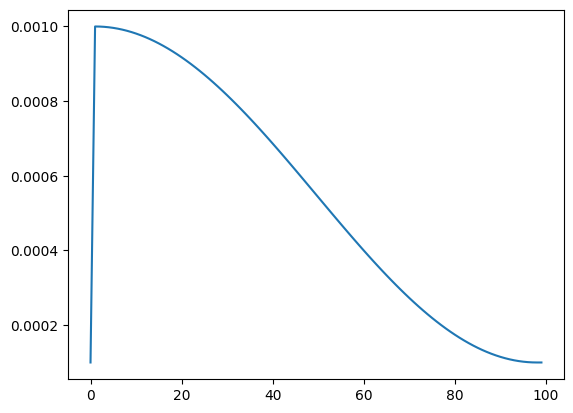

In [20]:
epochs = 100  # 25  # 15  # 12
learning_rate = 1e-3

epochs_warmup = 1
epochs_ending = 2
steps_per_epoch = int(np.ceil(len(train_files) * 100_000 / BATCH_SIZE))

lr_scheduler = keras.optimizers.schedules.CosineDecay(
    1e-4,
    (epochs - epochs_warmup - epochs_ending) * steps_per_epoch,
    warmup_target=learning_rate,
    warmup_steps=steps_per_epoch * epochs_warmup,
    alpha=0.1
)

plt.plot([lr_scheduler(it) for it in range(0, epochs * steps_per_epoch, steps_per_epoch)]);

In [21]:
keras.__version__

'3.2.1'

In [22]:
keras.utils.clear_session()

import keras
def x_to_seq(x):
    x_seq0 = keras.ops.transpose(keras.ops.reshape(x[:, 0:60 * 6], (-1, 6, 60)), (0, 2, 1))
    x_seq1 = keras.ops.transpose(keras.ops.reshape(x[:, 60 * 6 + 16:60 * 9 + 16], (-1, 3, 60)), (0, 2, 1))
    x_flat = keras.ops.reshape(x[:, 60 * 6:60 * 6 + 16], (-1, 1, 16))
    x_flat = keras.ops.repeat(x_flat, 60, axis=1)
    return keras.ops.concatenate([x_seq0, x_seq1, x_flat], axis=-1)


def build_cnn(activation='relu'):
    return keras.Sequential([
        keras.layers.Conv1D(1024, 3, padding='same', activation=activation),
        keras.layers.BatchNormalization(),
        keras.layers.Conv1D(512, 5, padding='same', activation=activation),
        keras.layers.BatchNormalization(),
        keras.layers.Conv1D(256, 7, padding='same', activation=activation),
        keras.layers.BatchNormalization(),
        keras.layers.Conv1D(128, 11, padding='same', activation=activation),
        keras.layers.BatchNormalization(),
    ])


X_input = x = keras.layers.Input(ds_train.element_spec[0].shape[1:])
x = keras.layers.Normalization(mean=norm_x.mean, variance=norm_x.variance)(x)
x = x_to_seq(x)


e = e0 = keras.layers.Conv1D(128, 1, padding='same')(x)
e = build_cnn()(e)
# add global average to allow some comunication between all levels even in a small CNN
e = e0 + e + keras.layers.GlobalAveragePooling1D(keepdims=True)(e)
e = keras.layers.BatchNormalization()(e)
e = e + build_cnn()(e)


p_all = keras.layers.Conv1D(14, 1, padding='same')(e)

p_seq = p_all[:, :, :6]
p_seq = keras.ops.transpose(p_seq, (0, 2, 1))
p_seq = keras.layers.Flatten()(p_seq)
assert p_seq.shape[-1] == 360

p_flat = p_all[:, :, 6:6 + 8]
p_flat = keras.ops.mean(p_flat, axis=1)
assert p_flat.shape[-1] == 8

P = keras.ops.concatenate([p_seq, p_flat], axis=1)

# build & compile
model = keras.Model(X_input, P)
model.compile(
    loss='mse',
    optimizer=keras.optimizers.Adam(lr_scheduler),
    metrics=[ClippedR2Score()]
)
model.build(tuple(ds_train.element_spec[0].shape))
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 556)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 556)            │              0 │ input_layer[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 360)            │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 180)            │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 16)             │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 6, 60)          │              0 │ get_item[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 3, 60)          │              0 │ get_item_1[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_2 (Reshape)       │ (None, 1, 16)          │              0 │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transpose (Transpose)     │ (None, 60, 6)          │              0 │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transpose_1 (Transpose)   │ (None, 60, 3)          │              0 │ reshape_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ repeat (Repeat)           │ (None, 60, 16)         │              0 │ reshape_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 60, 25)         │              0 │ transpose[0][0],       │
│                           │                        │                │ transpose_1[0][0],     │
│                           │                        │                │ repeat[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 60, 128)        │          3,328 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 60, 128)        │      4,302,208 │ conv1d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 60, 128)        │              0 │ conv1d[0][0],          │
│                           │                        │                │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 1, 128)         │              0 │ sequential[0][0]       │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 60, 128)        │              0 │ add[0][0],             │
│                      

 Total params: 8,610,062 (32.84 MB)

 Trainable params: 8,602,126 (32.81 MB)

 Non-trainable params: 7,936 (31.00 KB)

In [23]:
import sys
sys.version

'3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]'

In [ ]:
ds_train_target_normalized = ds_train.map(lambda x, y: (x, (y - mean_y) / stdd_y))
ds_valid_target_normalized = ds_valid.map(lambda x, y: (x, (y - mean_y) / stdd_y))
FIT =True
if FIT:
  history = model.fit(
      ds_train_target_normalized,
      validation_data=ds_valid_target_normalized,
      epochs=epochs,
      verbose=1,
      callbacks=[
          keras.callbacks.ModelCheckpoint(filepath='model.keras')
      ]
  )
else:
    model = keras.models.load_model('/content/drive/MyDrive/leap/keras_models/seq_to_seq.keras')

Epoch 1/100
   1832/Unknown 1829s 989ms/step - loss: 0.5756 - r2_score: 0.2316

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1832/1832 ━━━━━━━━━━━━━━━━━━━━ 2008s 1s/step - loss: 0.5755 - r2_score: 0.2317 - val_loss: 0.4012 - val_r2_score: 0.3712
Epoch 2/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 1976s 1s/step - loss: 0.3504 - r2_score: 0.4175 - val_loss: 0.3530 - val_r2_score: 0.4187
Epoch 3/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 1964s 1s/step - loss: 0.3276 - r2_score: 0.4446 - val_loss: 0.3256 - val_r2_score: 0.4462
Epoch 4/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 1954s 1s/step - loss: 0.3079 - r2_score: 0.4640 - val_loss: 0.3057 - val_r2_score: 0.4671
Epoch 5/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 1948s 1s/step - loss: 0.2909 - r2_score: 0.4788 - val_loss: 0.3059 - val_r2_score: 0.4679
Epoch 6/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 1942s 1s/step - loss: 0.2834 - r2_score: 0.4873 - val_loss: 0.3004 - val_r2_score: 0.4727
Epoch 7/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 1938s 1s/step - loss: 0.2781 - r2_score: 0.4948 - val_loss: 0.2946 - val_r2_score: 0.4790
Epoch 8/100
1832/1832 ━━━━━━━━━━━━━━━━━━━━ 1934s 1s/step - loss: 0.2731 - r2_scor

In [ ]:
tf.__version__

In [ ]:
y_valid = np.concatenate([yb for _, yb in ds_valid])
p_valid = model.predict(ds_valid, batch_size=BATCH_SIZE) * stdd_y + mean_y

In [ ]:
scores_valid = np.array([metrics.r2_score(y_valid[:, i], p_valid[:, i]) for i in range(len(TARGETS))])
plt.plot(scores_valid.clip(-1, 1))

In [ ]:
import numpy as np

In [ ]:
with open(f"scores.npy","wb") as file:
    np.save(file,scores_valid)

In [ ]:
mask = scores_valid <= 1e-3
f"Number of under-performing targets: {sum(mask)}"

In [ ]:
f"Clipped score: {scores_valid.clip(0, 1).mean()}"

In [ ]:
del y_valid, p_valid
gc.collect();